In [1]:
# Conectando el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Implementación HOG librerías**

In [5]:
#Cargando una imagen de prueba.
import cv2 # OpenCV para computer vision
import numpy as np
import matplotlib.pyplot as plt #Para graficar
from skimage.feature import hog
from skimage import exposure


#Cargando datos rostros Pascual
Ruta_dataset = '/content/drive/MyDrive/Semestre 8/ReconocimientoDePatrones/Semana 11y12/IMG'
Filas = 600
Columnas = 600

Longitud = 1176 #Número de características de HOGs
nImagenes = 800

# Aplicando el proceso a todas las imágenes (Tomando regiones de los rostros)
Matriz_Características = np.zeros((nImagenes,Longitud+1)) #Hogs + etiqueta

for i in range(1,nImagenes+1,1):
  Ruta=Ruta_dataset + '/IM (' + str(i) + ').jpg'
  img=cv2.imread(Ruta)
  I_gris=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  I_gris=cv2.resize(I_gris, (Filas,Columnas), interpolation = cv2.INTER_AREA)

  Recorte = cv2.resize(np.uint8(I_gris), (160,160))
  Vector_Hog, HOG_IMG = hog(Recorte, orientations = 6, pixels_per_cell=(20, 20),cells_per_block=(2, 2), visualize=True)
  Matriz_Características[i-1,:-1] = Vector_Hog

  if i>=1 and i<=200: #Enojado
    Matriz_Características[i-1,-1] = 1
  else:
    if i>=201 and i<=400: #Feliz
      Matriz_Características[i-1,-1]=2
    else:
      if i>=401 and i<=800: #Triste
        Matriz_Características[i-1,-1]=3
      else: #Preocupado
        Matriz_Características[i-1,-1]=4

print(Matriz_Características.shape)

(800, 1177)


In [9]:
#Dividing dataset into input (X) and output (Y) variables
X = Matriz_Características[:,:-1]
Y = Matriz_Características[:,-1]

#Dividiendo el conjunto de imágenes
from sklearn.model_selection import StratifiedShuffleSplit
Indices = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=18)
for train_index, test_index in Indices.split(X, Y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(640, 1176) (640,)
(160, 1176) (160,)


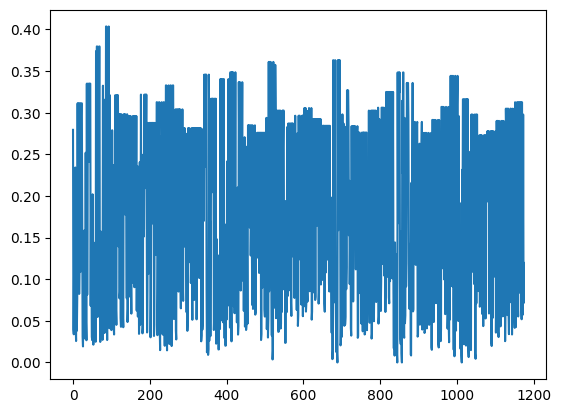

196.3364567156431


In [10]:
#Graficando características de un rostro
import matplotlib.pyplot as plt
x = np.zeros((1,Longitud))
x[0,:] = np.arange(0,Longitud,1)
plt.plot(x[0,:],X_train[6,:])
plt.show()

print(X_train[13,:].sum())

Entrenamiento del modelo finalizado
 
Mostrando métricas globales individuales: 
Accuracy KNN 0.4875
Precision KNN 0.48310213518291856
Recall KNN 0.5041666666666667
F1_Score KNN 0.4815612816228418
 
Reporte de Clasificación:
               precision    recall  f1-score   support

         1.0       0.42      0.62      0.50        40
         2.0       0.42      0.45      0.43        40
         3.0       0.61      0.44      0.51        80

    accuracy                           0.49       160
   macro avg       0.48      0.50      0.48       160
weighted avg       0.52      0.49      0.49       160

 


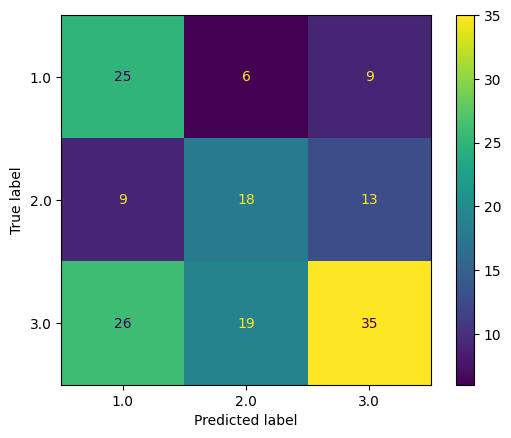

In [11]:
#Evaluando casos mediante todos los clasificadores
from sklearn.neighbors import KNeighborsClassifier
Modelo_0 = KNeighborsClassifier(3)
Modelo_0.fit(X_train, Y_train)
Y_pred_0 =Modelo_0.predict (X_test)
print('Entrenamiento del modelo finalizado')
print(" ")

from sklearn.metrics import confusion_matrix as CM,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score as ACC
from sklearn.metrics import precision_score as PR
from sklearn.metrics import recall_score as RC
from sklearn.metrics import f1_score as F1
from sklearn.metrics import classification_report

print('Mostrando métricas globales individuales: ')
print("Accuracy KNN",ACC(Y_test, Y_pred_0))
print("Precision KNN",PR(Y_test, Y_pred_0, average='macro'))
print("Recall KNN",RC(Y_test, Y_pred_0, average='macro'))
print("F1_Score KNN",F1(Y_test, Y_pred_0, average='macro'))
print(' ')

report = classification_report(Y_test, Y_pred_0)
print("Reporte de Clasificación:\n", report)
print(' ')

Matriz = CM(Y_test, Y_pred_0, labels = Modelo_0.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=Matriz,display_labels  =Modelo_0.classes_)
disp.plot()

Otros descriptores. [Aquí](https://scikit-image.org/docs/stable/api/skimage.feature.html)